# Supervised classification

In the data.csv there are letters (uppercases and lowercases) and numbers, 28x28 pixels in a row format.

* First, you need to know which labels are which, meaning you need to visualize some data to realize which number labels represents a letter, or a number.

In [1]:
# Import libraries
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('./datasets/data_all.csv', nrows=10000)
data.head(5)

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# listamos los valores unicos de e
data.e.unique()

array([36.,  0.,  3., 33., 30., 24., 40.,  5.,  8.,  2.,  4., 47.,  7.,
       32., 60., 18., 46., 59., 12., 37., 53., 15.,  1.,  9., 38., 43.,
       44., 19., 55.,  6., 58., 41., 20., 29., 28., 31., 42., 39., 25.,
       49., 35., 14., 57., 34., 26., 61., 11., 13., 27., 51., 23., 10.,
       22., 56., 48., 52., 16., 17., 54., 21., 50., 45.])

In [4]:
import matplotlib.pyplot as plt

In [5]:
# función que muestra la imagen contenida en cada renglon codificado
def img_show(min_val, max_val):
    rows = 10
    cols = 10
    fig = plt.figure(figsize=(20,8))
    for i in range(min_val, max_val):
        img = data[data.e==(i-1)].iloc[0,1:].to_numpy().reshape(28,28)
        fig.add_subplot(rows, cols, i)
        plt.imshow(img)
    plt.show();

In [6]:
# Primero rvisemos el conetido de cada renglon para identificar los patrones.
img_show(1, 63)

* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

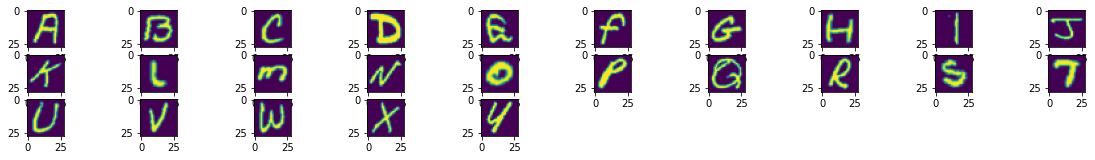

In [ ]:
img_show(11, 36)

In [ ]:
# Inicializamos X con todas las columnas excepto la e, y "y" con la e
nums = list(range(11,36))
df = data.loc[data.e.isin(nums)]
X = df.drop(columns='e').to_numpy()
y = df.e.to_numpy()


In [ ]:
# creamos los sets de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# inicializamos el modelo random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [ ]:
# entremamos el modelo con los sets de entrenamiento
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# predecimos los valores de prueba
y_pred = rfc.predict(X_test)

In [ ]:
# validamos la precisión del resultado
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average=None)

array([0.73684211, 1.        , 0.85714286, 1.        , 0.82352941,
       0.69230769, 1.        , 1.        , 0.72727273, 0.75      ,
       1.        , 0.88888889, 0.70588235, 0.76923077, 0.7311828 ,
       0.91304348, 1.        , 0.64705882, 0.8       , 0.85714286,
       0.81578947, 0.5625    , 0.71428571, 0.85714286, 0.72222222])

* Try to do the same thing with lowercases.

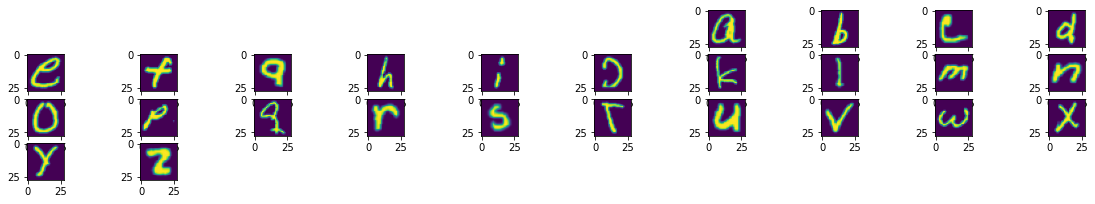

In [ ]:
img_show(37, 63)

In [ ]:
# Inicializamos X con todas las columnas excepto la e, y "y" con la e
nums = list(range(37,63))
df = data.loc[data.e.isin(nums)]
X = df.drop(columns='e').to_numpy()
y = df.e.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# incializamos, entrenamos , predecimos y validamos el modelo
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
precision_score(y_test, y_pred, average=None)

array([0.66666667, 1.        , 0.85714286, 0.875     , 0.84210526,
       0.82608696, 1.        , 0.5       , 0.62162162, 0.75      ,
       1.        , 1.        , 0.8       , 0.79166667, 0.71578947,
       0.91666667, 1.        , 0.58823529, 0.79166667, 0.81481481,
       0.96969697, 0.71428571, 0.5       , 0.625     , 0.68421053])

* Try to do the same thing with numbers.

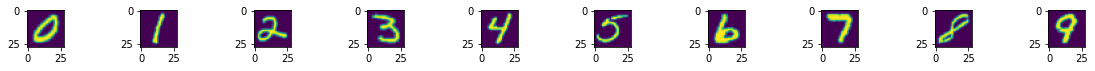

In [ ]:
img_show(1, 11)

In [ ]:
# Inicializamos X con todas las columnas excepto la e, y "y" con la e
nums = list(range(1,11))
df = data.loc[data.e.isin(nums)]
X = df.drop(columns='e').to_numpy()
y = df.e.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# incializamos, entrenamos , predecimos y validamos el modelo
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
precision_score(y_test, y_pred, average=None)

array([0.66666667, 0.90909091, 0.86206897, 1.        , 0.82352941,
       0.76      , 1.        , 1.        , 0.66666667, 0.75      ,
       1.        , 1.        , 0.85714286, 0.8       , 0.74725275,
       0.88      , 1.        , 0.64705882, 0.77777778, 0.79310345,
       0.96969697, 0.6875    , 0.66666667, 0.71428571, 0.66666667])